In [2]:
import numpy as np
import matplotlib.pyplot as plt

from Code.analysis import draw_slope
from Code.computation import auto_correlation, get_total_dissipation_rate
from Code.sandpile import SandpileND
from analysis import *
from utils import *


In [ ]:
from sandpile import *
system = SandpileND(2, 20, 7, "closed", "non conservative")
# system(100_000)
system.run_multiple_samples("data", 10_000, 200, step=100, time_cut_off=2000, clear=True)
# draw_slope(system.average_slopes[:10000])

In [8]:
# df = load_combine_avalanche_data_samples("test_data/d2_g40_c7_cl_nco")
data = load_dissipation_rates("data/d2_g20_c7_cl_nco")
# data[0][0]

  0%|          | 0/200 [00:00<?, ?it/s]

-1.853+/-0.009


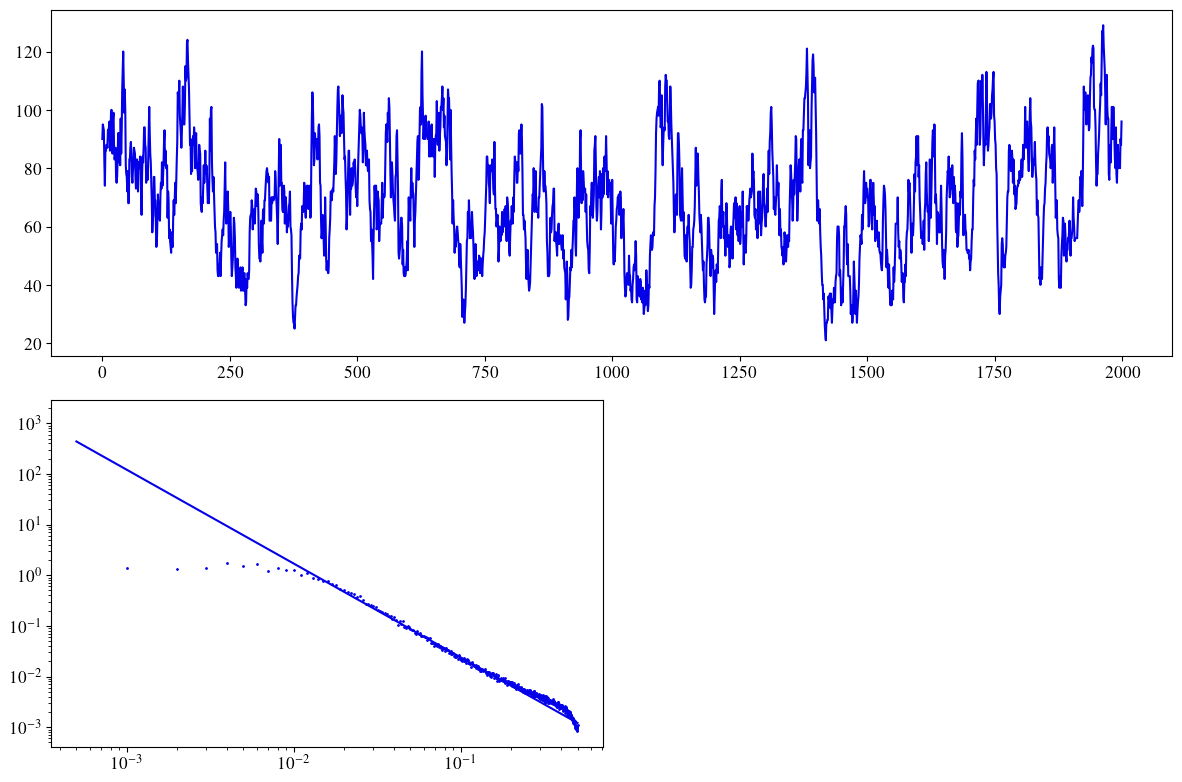

In [12]:
from analysis import *
import scipy
# plt.ylim(10e-3)
N = 2_000
f, n = get_total_dissipation_rate(data[0], N)

plt.figure(1, figsize=(12, 8))
# plt.subplot(211)
# plt.plot(range(n), f)


plt.subplot(223)
plt.xscale("log")
plt.yscale("log")
# plt.scatter(freq[:n//2], s[:n//2], s=3)
s = np.zeros(n//2 + 1)
freq = np.fft.rfftfreq(n, 1)

for i in range(len(data)):
    f, n = get_total_dissipation_rate(data[i], N)
    if i == 1:
        plt.subplot(211)
        plt.plot(range(n), f)
    corr = scipy.signal.correlate(f, f, mode="same", method="fft").astype(np.float64)
    corr /= corr.max()
    s += np.fft.rfft(corr).real
    # s += np.fft.rfft(f).__abs__()**2
    # freq = np.fft.rfftfreq(len(corr), 1)

plt.subplot(223)
s /= len(data)
plt.scatter(freq, s, s=1)
# plt.plot(freq, s)

# s = np.fft.fft(f).__abs__()**2
# freq = np.fft.fftfreq(len(f), 1)
# plt.scatter(freq, s, s=3)
# 
m, b = calculate_scaling_exponent(freq, s, lower_limit=0.01, upper_limit=0.2)
plt.plot(freq[1:], np.exp(b.nominal_value) * freq[1:]**m.nominal_value)
print(m)

# print(freq)